In [11]:
import os
from glob import glob
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def getSweepData(data_folders, param):
    
    scores    = pd.DataFrame()
    wers_dict = dict()
    for sweep in data_folders:

        with open(os.path.join(sweep, 'log.txt')) as f:
            lines = f.readlines()

        log  = ' '.join(np.asarray(lines))
        try:
            val    = float(re.findall(fr'{param}=(\d+.\d+)', log)[0])
            wer    = float(re.findall(r'validation WER: (\d+.\d+)', log)[-1])
            scores = scores.append([{param : val, 
                                     'WER' : wer,
                                     }])
            wers_dict[val] = np.asarray([float(x) for x in re.findall(r'validation WER: (\d+.\d+)', log)])
        except:
            continue
            
    return scores, wers_dict
    

In [58]:
import neptune

In [59]:
neptune.new.ini

<module 'neptune.new' from '/oak/stanford/groups/shenoy/ghwilson/miniconda3/envs/mag-3.9/lib/python3.9/site-packages/neptune/new/__init__.py'>

In [63]:
A= np.ones((1, 80, 6000))

In [64]:
A[...,:5000].shape

(1, 80, 5000)

### HP sweep

Let's look at performance as a function of hyperparams

best thus far, 34% WER:
 - 1000 Hz data, seqlen = 600 (* 8)
 - model_size = 1300
 - num_layers = 8
 - dropout = 0.2
 - learning_rate = 1e-3

In [8]:
data_dir = '/oak/stanford/projects/babelfish/magneto/GaddyPaper/output/efficiency_sweeps/GaddyTransformer/1/log.txt'
with open(data_dir) as f:
    lines = f.readlines()

In [9]:
lines

['3da3532cb8ba63fa524c0e776c845a19cd61b7a9\n',
 '\n',
 'diff --git a/architecture.py b/architecture.py\n',
 'index 4fc3793..771be7e 100644\n',
 '--- a/architecture.py\n',
 '+++ b/architecture.py\n',
 '@@ -1,11 +1,14 @@\n',
 ' import random\n',
 '-\n',
 ' import torch\n',
 ' from torch import nn\n',
 ' import torch.nn.functional as F\n',
 '-\n',
 ' from transformer import TransformerEncoderLayer\n',
 ' \n',
 '+\n',
 '+import sys\n',
 "+sys.path.append('/home/users/ghwilson/projects/subvocal_speech/magneto/models/')\n",
 '+from s4d import S4D\n',
 '+\n',
 ' from absl import flags\n',
 ' FLAGS = flags.FLAGS\n',
 " flags.DEFINE_integer('model_size', 768, 'number of hidden dimensions')\n",
 '@@ -39,7 +42,8 @@ class ResBlock(nn.Module):\n',
 '             res = input_value\n',
 ' \n',
 '         return F.relu(x + res)\n',
 '-\n',
 '+    \n',
 '+    \n',
 ' class Model(nn.Module):\n',
 '     def __init__(self, num_features, num_outs, num_aux_outs=None):\n',
 '         super().__init__()\n',
 

In [1]:
' '.join(['transduction_model.py', '--output_directory=/oak/stanford/projects/babelfish/magneto/GaddyPaper/output/efficiency_sweeps/S4/1', '--epochs', '80', '--data_size_fraction=1', '--hifigan_checkpoint=/oak/stanford/projects/babelfish/magneto/GaddyPaper/pretrained_models/hifigan_finetuned/checkpoint', '--S4=1', '--model_size=700', '--num_layers=8', '--dropout=0.1', '--learning_rate=1e-2'])

'transduction_model.py --output_directory=/oak/stanford/projects/babelfish/magneto/GaddyPaper/output/efficiency_sweeps/S4/1 --epochs 80 --data_size_fraction=1 --hifigan_checkpoint=/oak/stanford/projects/babelfish/magneto/GaddyPaper/pretrained_models/hifigan_finetuned/checkpoint --S4=1 --model_size=700 --num_layers=8 --dropout=0.1 --learning_rate=1e-2'

In [10]:
param    = 'model_size'
data_dir = '/oak/stanford/projects/babelfish/magneto/GaddyPaper/output/EMGToText/HP_sweeps/S4/'
data_dir = '/oak/stanford/projects/babelfish/magneto/GaddyPaper/output/EMGToVoice/HP_sweeps/S4/'
sweeps   = glob(os.path.join(data_dir, param, '*'))
#sweeps   = glob(os.path.join(data_dir, param, '*'))

scores, wers_dict = getSweepData(sweeps, param)

NameError: name 'glob' is not defined

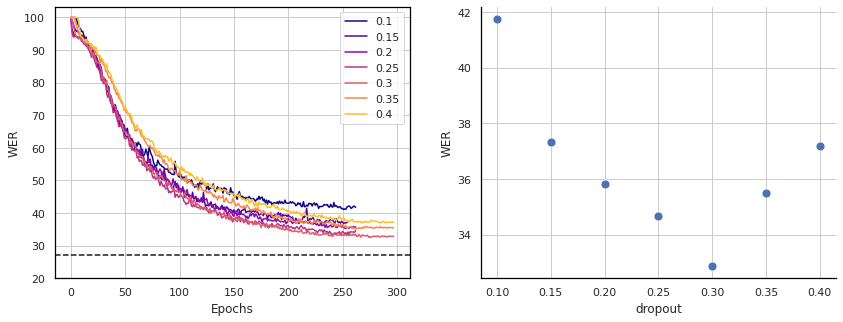

In [187]:
from matplotlib import cm

plt.figure(figsize=(14, 5))


cmap = cm.get_cmap('plasma', 8)    # 11 discrete colors

plt.subplot(1, 2, 1)

for i, key in enumerate(sorted(wers_dict.keys())):
    plt.plot(wers_dict[key], c = cmap(i), label = key)
plt.ylim([20, None])
plt.axhline(27, linestyle = '--', c = 'k')
plt.xlabel('Epochs')
plt.ylabel('WER')
plt.legend()


plt.subplot(1, 2, 2)

sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.set_style({'axes.linewidth': 2, 'axes.edgecolor':'black'})

sns.scatterplot(scores, x = param, y = 'WER', s=80)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel(param)
#plt.xscale('log', base =10)

plt.show()

/tmp/ipykernel_61569/3343985958.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([{param : val,
/tmp/ipykernel_61569/3343985958.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([{param : val,
/tmp/ipykernel_61569/3343985958.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([{param : val,
/tmp/ipykernel_61569/3343985958.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([{param : val,
/tmp/ipykernel_61569/3343985958.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

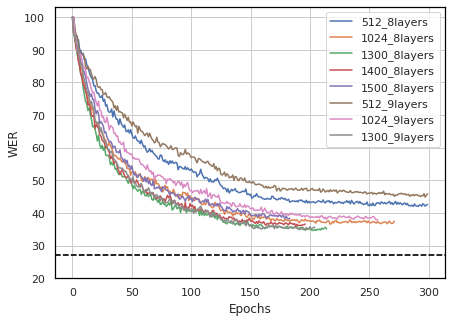

In [15]:
plt.figure(figsize=(7, 5))

param    = 'model_size'
data_dir = '/oak/stanford/projects/babelfish/magneto/GaddyPaper/output/EMGToText/HP_sweeps/S4/'

for layers in ['_8layers', '_9layers']:
    sweeps   = glob(os.path.join(data_dir, param + '_1000Hz_longseq' + layers, '*'))
    scores, wers_dict = getSweepData(sweeps, param)
    
    for i, key in enumerate(sorted(wers_dict.keys())):
        plt.plot(wers_dict[key], label = str(int(key)) + layers)
    plt.ylim([20, None])
    plt.axhline(27, linestyle = '--', c = 'k')
    plt.xlabel('Epochs')
    plt.ylabel('WER')
    plt.legend()

In [15]:
import glob

fname = glob.glob('/oak/stanford/projects/babelfish/magneto/GaddyPaper/processed_data/*/*/*.mat')[0]

In [18]:
import scipy

scipy.io.loadmat(fname).keys()

dict_keys(['__header__', '__version__', '__globals__', 'audio_features', 'emg', 'text', 'file_label', 'session_ids', 'book_location', 'silent', 'raw_emg', 'parallel_voiced_audio_features', 'parallel_voiced_emg', 'phonemes', 'audio_file'])

In [8]:
import torch

In [68]:
#lr_sched = torch.optim.lr_scheduler.MultiStepLR(optim, milestones=[125,150,175], gamma=.5)

optim = torch.optim.AdamW(params = [torch.tensor(1)], lr = 1e-3)

schedulers = [
    torch.optim.lr_scheduler.MultiStepLR(optim, milestones=[150,175,200], gamma=.5),
    torch.optim.lr_scheduler.OneCycleLR(optim, max_lr = 1e-3, epochs = 300,
                                              steps_per_epoch = int(8055 / ( 2* 32)))
]

In [69]:
lrs_list = list()
for idx, lr_sched in enumerate(schedulers):
    lrs = list()
    for i in range(300):
        if idx == 0:
            lr_sched.step()
        else:
            for j in range(int(8055 / ( 2* 32))):
                lr_sched.step()
        lrs.append(lr_sched.get_lr())
    lrs_list.append(lrs)

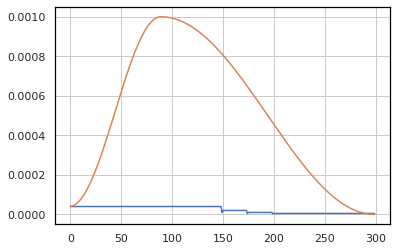

In [70]:
for lrs in lrs_list:
    plt.plot(lrs)

In [31]:
from absl import flags
FLAGS = flags.FLAGS
flags.DEFINE_boolean('debug', False, 'debug')
flags.DEFINE_string('output_directory', 'output', 'where to save models and outputs')
flags.DEFINE_integer('S4', 0, 'Toggle S4 model in place of transformer')
flags.DEFINE_integer('batch_size', 32, 'training batch size')
flags.DEFINE_float('learning_rate', 3e-4, 'learning rate')
flags.DEFINE_integer('epochs', 200, 'training epochs')
flags.DEFINE_integer('learning_rate_warmup', 1000, 'steps of linear warmup')
flags.DEFINE_integer('learning_rate_patience', 5, 'learning rate decay patience')
flags.DEFINE_string('start_training_from', None, 'start training from this model')
flags.DEFINE_float('l2', 0, 'weight decay')
flags.DEFINE_string('evaluate_saved', None, 'run evaluation on given model file')
flags.DEFINE_string('lm_directory', '/oak/stanford/projects/babelfish/magneto/GaddyPaper/pretrained_models/librispeech_lm/', 
                    'Path to KenLM language model')
flags.DEFINE_string('base_dir', '/oak/stanford/projects/babelfish/magneto/GaddyPaper/processed_data/',
                    'path to processed EMG dataset')

In [37]:
FLAGS([''])

['']

### Efficiency sweeps
look at performance as a function of fraction of dataset retained.

In [2]:
import numpy as np, jiwer
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

examples = np.random.choice(np.arange(len(targets)), 5)

for i, example_idx in enumerate(examples):
    print('\n')
    printmd('**Target:** ' + targets[i])
    printmd('**Prediction:**' + predictions[i])

ModuleNotFoundError: No module named 'jiwer'

In [32]:
removeBlanks = True

if removeBlanks:
    for i, (targ, pred) in enumerate(zip(targets, predictions)):
        if targ == '':
            del targets[i]
            del predictions[i]

transformation = jiwer.Compose([jiwer.RemovePunctuation(), jiwer.ToLowerCase()])
targets     = transformation(targets)
predictions = transformation(predictions)


jiwer.wer(targets, predictions)

0.2659313725490196